天马玻璃数据分析

1.拉引量、碎玻璃比例-温度关系

2.拉引量、碎玻璃比例-天然气流量关系

1.数据处理

In [1]:
# 导入程序库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")

plt.style.use("seaborn")
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False #用来正常显示负号
barfont = labelfont = {
    "family": "SimHei",
    "weight": "normal",
    "size": 12,
    "color": "#4169E1"
}
titlefont = {
    "family": "SimHei",
    "weight": "normal",
    "size": 14,
    "color": "#9400D3"
}

k:\python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
k:\python\Python310\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
k:\python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# 数据获取，读取csv
import re
import os
datas_path = "./data/"
datas_0 = {}

for i in os.listdir(datas_path):
    if not i.endswith("xls"):
        continue
    cols = ['日期', '拉引量', '温度', 'Gas/Hour', '碎玻比例']
    df = pd.read_excel(datas_path+i,sheet_name="Furnace",names=cols,usecols=range(0,5))
    df.dropna()
    index = df[df["拉引量"] == "拉引量"].index.tolist()[0]
    # index = df[df["拉引量"] == "拉引量"].index
    df = df[index+1:]
    df = df[~df["拉引量"].astype(str).str.match("约")]

    datas_0[i] = df

    # for sample_data in df.itertuples(index=True,name="Pandas"):
    #     if "拉引量" in sample_data:
    #         df.columns = sample_data[1:]
    # df = df[df['拉引量'].apply(
    # lambda x: True if re.match(r"([1-9][0-9]*|0)\.[0-9]+", str(x)) and re.match(
    #     r"([1-9][0-9]*|0)\.[0-9]+", str(x)).group(0) == str(x) else False)].copy()
    # df=df.rename(columns={np.NaN:'Date',"日期":"Date","NaT":"Date"})

# datas_0

In [3]:
# 数据处理
datas_1 = pd.DataFrame()
for key,value in datas_0.items():
    datas01 = value
    # columns = key
    # cols = datas01.columns[5:-2]
    # datas02 = datas01.iloc[1:,5:-2]

    datas_1 = pd.concat([datas_1,datas01])
    
datas_1["日期"] = pd.to_datetime(datas_1["日期"])
datas_1[["拉引量","碎玻比例","温度","Gas/Hour"]] = datas_1[["拉引量","碎玻比例","温度","Gas/Hour"]].astype("float")

# datas_1 = datas_1[(datas_1["温度"] >1540)]
datas_1.sort_values(by=["日期"],inplace=True)

# datas_1.loc[(datas_1["碎玻比例"] >1)]["碎玻比例"]= datas_1.loc[(datas_1["碎玻比例"] >1)]["碎玻比例"]/100
datas_1.loc[(datas_1["碎玻比例"] >1),"碎玻比例"]= datas_1.loc[(datas_1["碎玻比例"] >1),"碎玻比例"]/100
# datas_1 = datas_1[(datas_1["拉引量"] >0)]
datas_1.reset_index(drop=True,inplace=True)
datas_1

,日期,拉引量,温度,Gas/Hour,碎玻比例
0,2020-07-26,252.03,1575.0,1605.0,0.25
1,2020-07-27,252.08,1575.0,1600.0,0.25
2,2020-07-28,252.08,1575.0,1605.0,0.25
3,2020-07-29,254.25,1575.0,1590.0,0.25
4,2020-07-30,254.72,1572.0,1605.0,0.25
...,...,...,...,...,...
808,2022-10-21,230.28,1572.0,1400.0,0.40
809,2022-10-22,230.01,1570.0,1380.0,0.40
810,2022-10-23,230.01,1570.0,1375.0,0.40
811,2022-10-24,230.01,1570.0,1380.0,0.40


可视化

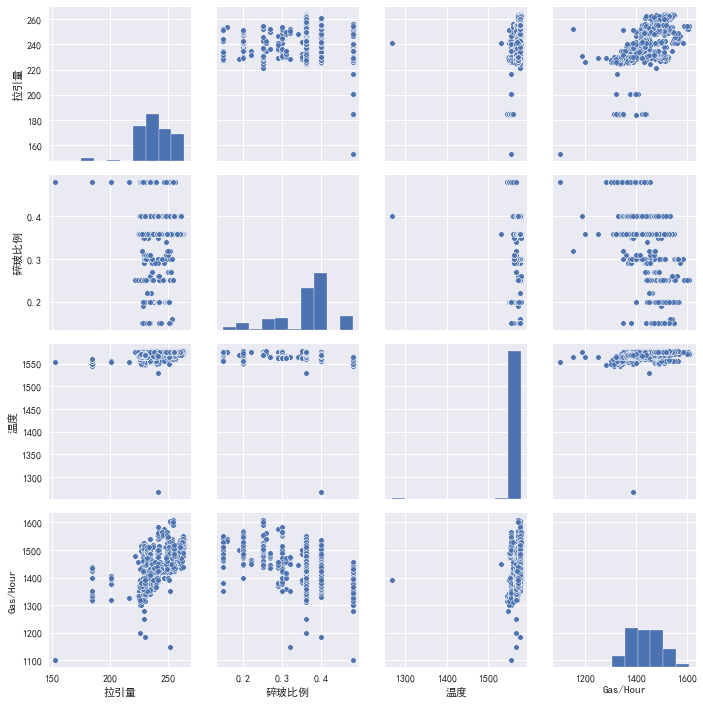

In [4]:
g = sns.PairGrid(datas_1[["拉引量","碎玻比例","温度","Gas/Hour"]])
# g.map(sns.scatterplot)
g.map_diag(plt.hist,edgecolor="w")
# g.map_offdiag(plt.scatter)
g.map_offdiag(sns.scatterplot,s=30)

In [5]:
datas_1 = datas_1.query("拉引量>220 & 温度>1540")
datas_1 = datas_1[(datas_1["Gas/Hour"]>1250)]

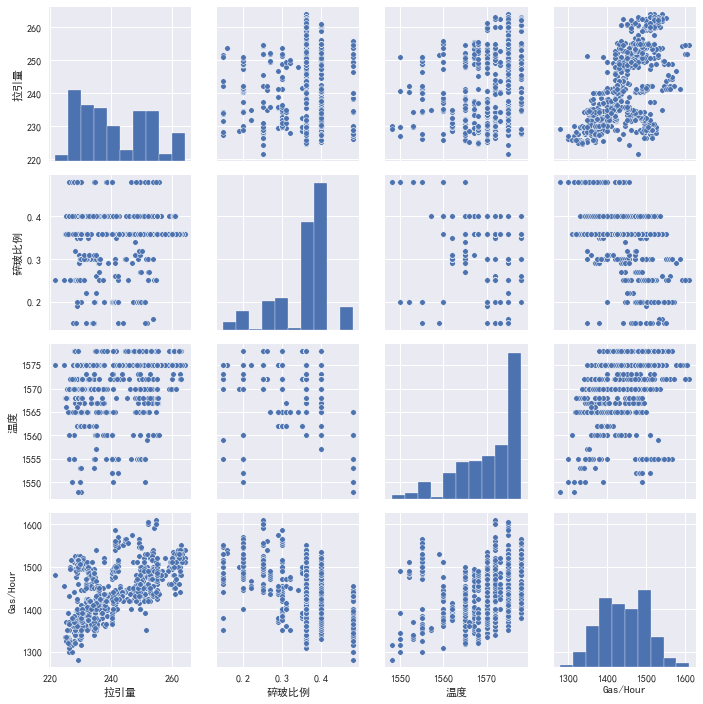

In [6]:
g = sns.PairGrid(datas_1[["拉引量","碎玻比例","温度","Gas/Hour"]])
# g.map(sns.scatterplot)
g.map_diag(plt.hist,edgecolor="w")
# g.map_offdiag(plt.scatter)
g.map_offdiag(sns.scatterplot,s=30)

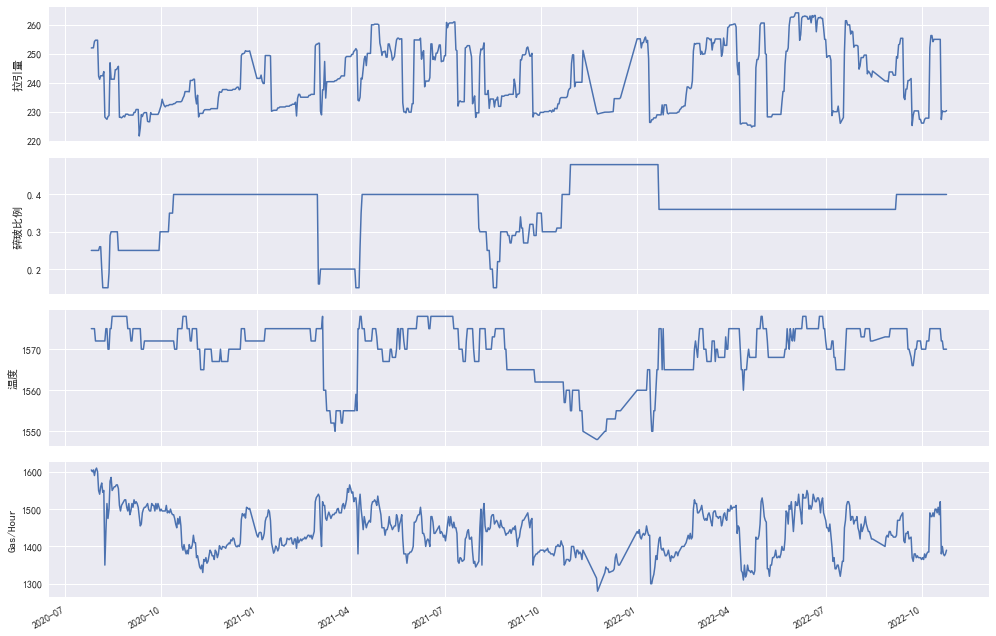

In [7]:
# 绘图
fig,axes = plt.subplots(4,1,figsize=(14,9))

# 设置格式
col_names = ["拉引量","碎玻比例","温度","Gas/Hour"]
for i in range(len(axes)):
    axes[i].plot(datas_1["日期"],datas_1[col_names[i]],label=col_names[i],linewidth=1.5)
    axes[i].set_ylabel(col_names[i])

axes[0].set_xlabel("日期")
# ax1.set_ylim(0,300)

plt.gcf().autofmt_xdate()
# plt.legend()
plt.tight_layout()


2.特征工程

In [8]:
X = datas_1[["拉引量","碎玻比例"]].astype("float")
y_tem = datas_1["温度"].astype("float")
y_gas = datas_1["Gas/Hour"].astype("float")

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_tem_train,y_tem_test,y_gas_train,y_gas_test = train_test_split(X,y_tem,y_gas,random_state=0,test_size=1/8,shuffle=False)

X_train.shape,X_test.shape,y_tem_test.shape,y_gas_test.shape

((675, 2), (97, 2), (97,), (97,))

3.机器学习

In [10]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
import sklearn.metrics as sm

In [11]:
def eva_model(model, X_train, X_test, y_tem_train, y_tem_test, y_gas_train, y_gas_test):
    grid = model
    grid.fit(X_train, y_tem_train)
    y_tem_pred = grid.predict(X_test)
    y_tem_pred02 = grid.predict(X_train)
    std_tem = (sm.mean_squared_error(y_tem_test, y_tem_pred))**0.5
    print("温度误差(%):", sm.mean_absolute_percentage_error(y_tem_test,
          y_tem_pred)*100, "均方根误差RSME:", std_tem, "R2分数:", "train:", sm.r2_score(y_tem_train, y_tem_pred02), "test:", sm.r2_score(y_tem_test, y_tem_pred))
    grid.fit(X_train, y_gas_train)
    y_gas_pred = grid.predict(X_test)
    y_gas_pred02 = grid.predict(X_train)
    std_gas = (sm.mean_squared_error(y_gas_test, y_gas_pred))**0.5
    print("天然气误差(%):", sm.mean_absolute_percentage_error(y_gas_test,
          y_gas_pred)*100, "均方根误差RSME:", std_gas, "R2分数:", "train:", sm.r2_score(y_gas_train, y_gas_pred02), "test:", sm.r2_score(y_gas_test, y_gas_pred))
    plt.figure(figsize=(24, 15))
    plt.subplot(2, 1, 1)
    # plt.plot(datas_1["日期"][:y_tem_train.shape[0]],y_tem_train,label="温度-训练")
    plt.plot(datas_1["日期"][y_tem_train.shape[0]:], y_tem_test,marker="o", label="温度-测试")
    plt.plot(datas_1["日期"][y_tem_train.shape[0]:],
             y_tem_pred, label="温度-预测", linestyle="--")
    plt.plot(datas_1["日期"][y_tem_train.shape[0]:],
             y_tem_pred+std_tem, label="温度-预测-上限", linestyle="-.")
    plt.plot(datas_1["日期"][y_tem_train.shape[0]:],
             y_tem_pred-std_tem, label="温度-预测-下限", linestyle="-.")
    # plt.ylim(1540,1600)
    plt.legend()

    plt.subplot(2, 1, 2)
    # plt.plot(datas_1["日期"][:y_gas_train.shape[0]],y_gas_train,label="Gas/Hour-训练")
    plt.plot(datas_1["日期"][y_gas_train.shape[0]:],
             y_gas_test,marker="o", label="Gas/Hour-测试")
    plt.plot(datas_1["日期"][y_gas_train.shape[0]:],
             y_gas_pred, label="Gas/Hour-预测", linestyle="--")
    plt.plot(datas_1["日期"][y_gas_train.shape[0]:], y_gas_pred +
             std_gas, label="Gas/Hour-预测-上限", linestyle="-.")
    plt.plot(datas_1["日期"][y_gas_train.shape[0]:], y_gas_pred -
             std_gas, label="Gas/Hour-预测-下限", linestyle="-.")
    # plt.ylim(1540,1600)
    plt.legend()
    plt.gcf().autofmt_xdate()
    plt.tight_layout()

    # plt.figure(figsize=(12,15))
    # plt.subplot(2,1,1)
    # plt.scatter(y_tem_test,y_tem_pred,label="温度预测")
    # plt.xlabel("真实值")
    # plt.ylabel("预测值")
    # # plt.ylim(1540,1600)
    # plt.legend()

    # plt.subplot(2,1,2)
    # plt.scatter(y_gas_test,y_gas_pred,label="天然气预测")
    # plt.xlabel("真实值")
    # plt.ylabel("预测值")
    # # plt.ylim(1540,1600)
    # plt.legend()
    # plt.gcf().autofmt_xdate()
    # plt.tight_layout()


3.1 岭回归

In [12]:
from sklearn.linear_model import Ridge
model = make_pipeline(MinMaxScaler(),PolynomialFeatures(),Ridge())
# model = make_pipeline(SimpleImputer(),MinMaxScaler(),PolynomialFeatures(),Ridge())
param_grid = {
        "polynomialfeatures__degree":np.arange(1,5),
        "ridge__alpha":[0,0.00001,0.0001,0.001,0.01,0.1,1,10,100],
    }
grid = RandomizedSearchCV(model,param_grid,cv=5)
# grid = GridSearchCV(model,param_grid,cv=5)

温度误差(%): 0.16238849868475846 均方根误差RSME: 2.9785833252332696 R2分数: train: 0.41102199228622094 test: 0.0904149464337346
天然气误差(%): 1.2127619125841875 均方根误差RSME: 22.411448130605887 R2分数: train: 0.6662764761091807 test: 0.7977161526715644


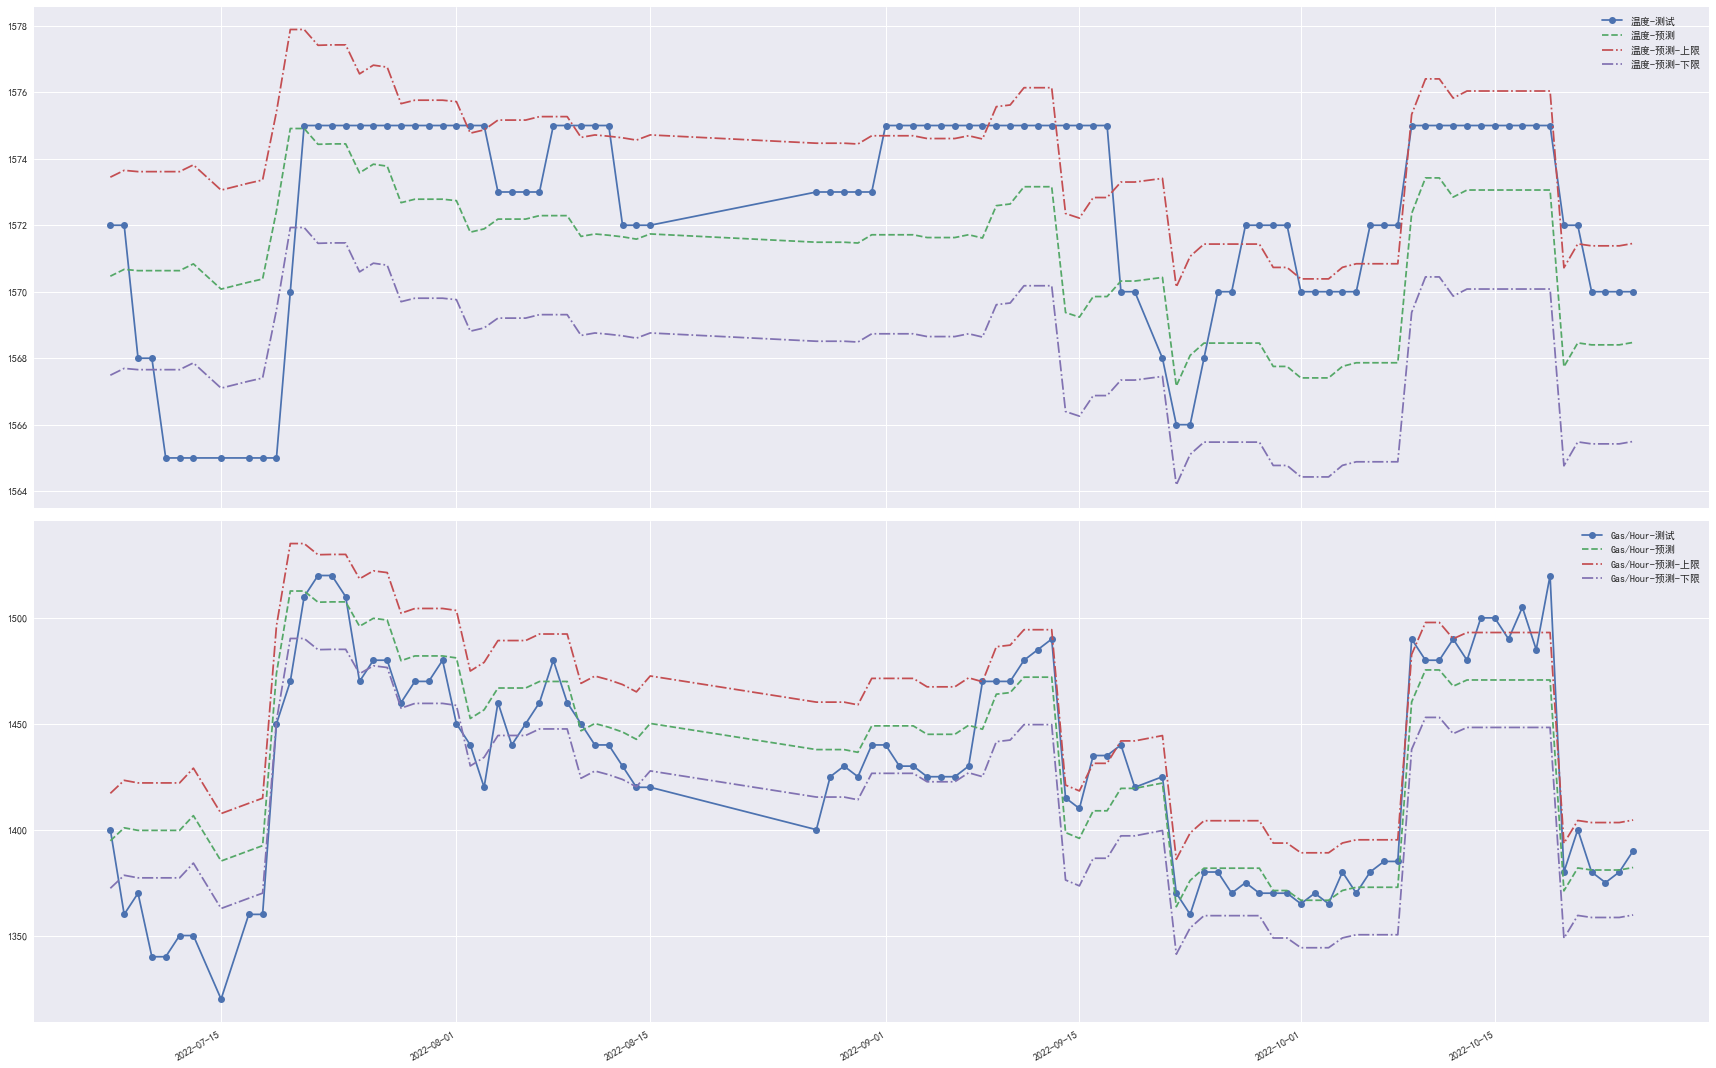

In [13]:
eva_model(grid,X_train,X_test,y_tem_train,y_tem_test,y_gas_train,y_gas_test)

3.2 SVR

In [14]:
from sklearn.svm import SVR
model = make_pipeline(MinMaxScaler(),SVR())
# model = make_pipeline(MinMaxScaler(),PolynomialFeatures(degree=5),SVR())
param_grid = {
        # "polynomialfeatures__degree":np.arange(1,5),
        "svr__C":[0,0.0001,0.001,0.01,0.1,1,10,100],
        "svr__gamma":[0.0001,0.001,0.01,0.1,1],
    }
grid = RandomizedSearchCV(model,param_grid,cv=5)
# grid = GridSearchCV(model,param_grid,cv=5)

k:\python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "k:\python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "k:\python\Python310\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "k:\python\Python310\lib\site-packages\sklearn\svm\_base.py", line 251, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "k:\python\Py

温度误差(%): 0.17008204141084282 均方根误差RSME: 3.173512854653054 R2分数: train: -0.11673370141452 test: -0.0325339283221906


k:\python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "k:\python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "k:\python\Python310\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "k:\python\Python310\lib\site-packages\sklearn\svm\_base.py", line 251, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "k:\python\Pyth

天然气误差(%): 1.4613422552494195 均方根误差RSME: 26.455369874263795 R2分数: train: 0.5742490927881962 test: 0.718129879354986


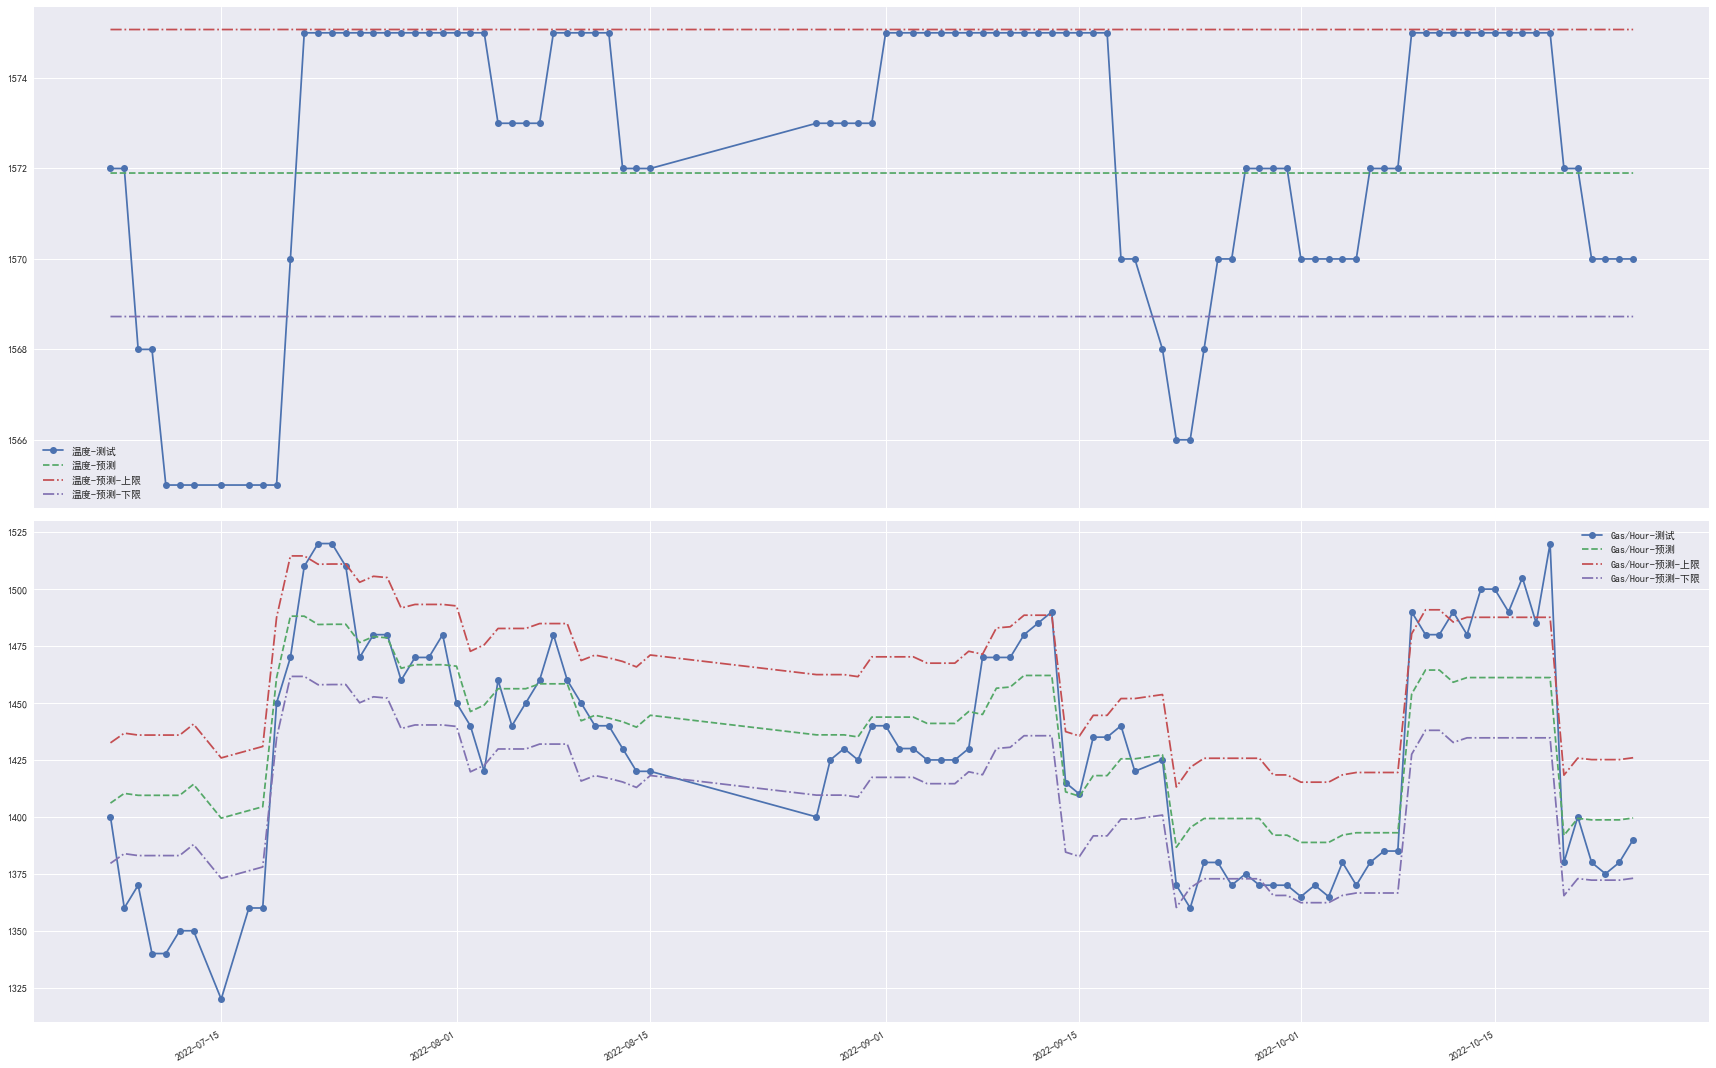

In [15]:
eva_model(grid,X_train,X_test,y_tem_train,y_tem_test,y_gas_train,y_gas_test)

3.3 RFR随机森林

In [16]:
from sklearn.ensemble import RandomForestRegressor
model = make_pipeline(RandomForestRegressor())
param_grid = {
        "randomforestregressor__n_estimators":[100]
        # "randomforestregressor__n_estimators":[100,500,1000,5000]
    }
grid = GridSearchCV(model,param_grid,cv=5)
# grid = GridSearchCV(model,param_grid,cv=5)

温度误差(%): 0.15287496194056227 均方根误差RSME: 2.935653588147432 R2分数: train: 0.9535185186510775 test: 0.11644534116227212
天然气误差(%): 1.4648296049398954 均方根误差RSME: 25.77571316804735 R2分数: train: 0.9652354649313412 test: 0.7324267175972966


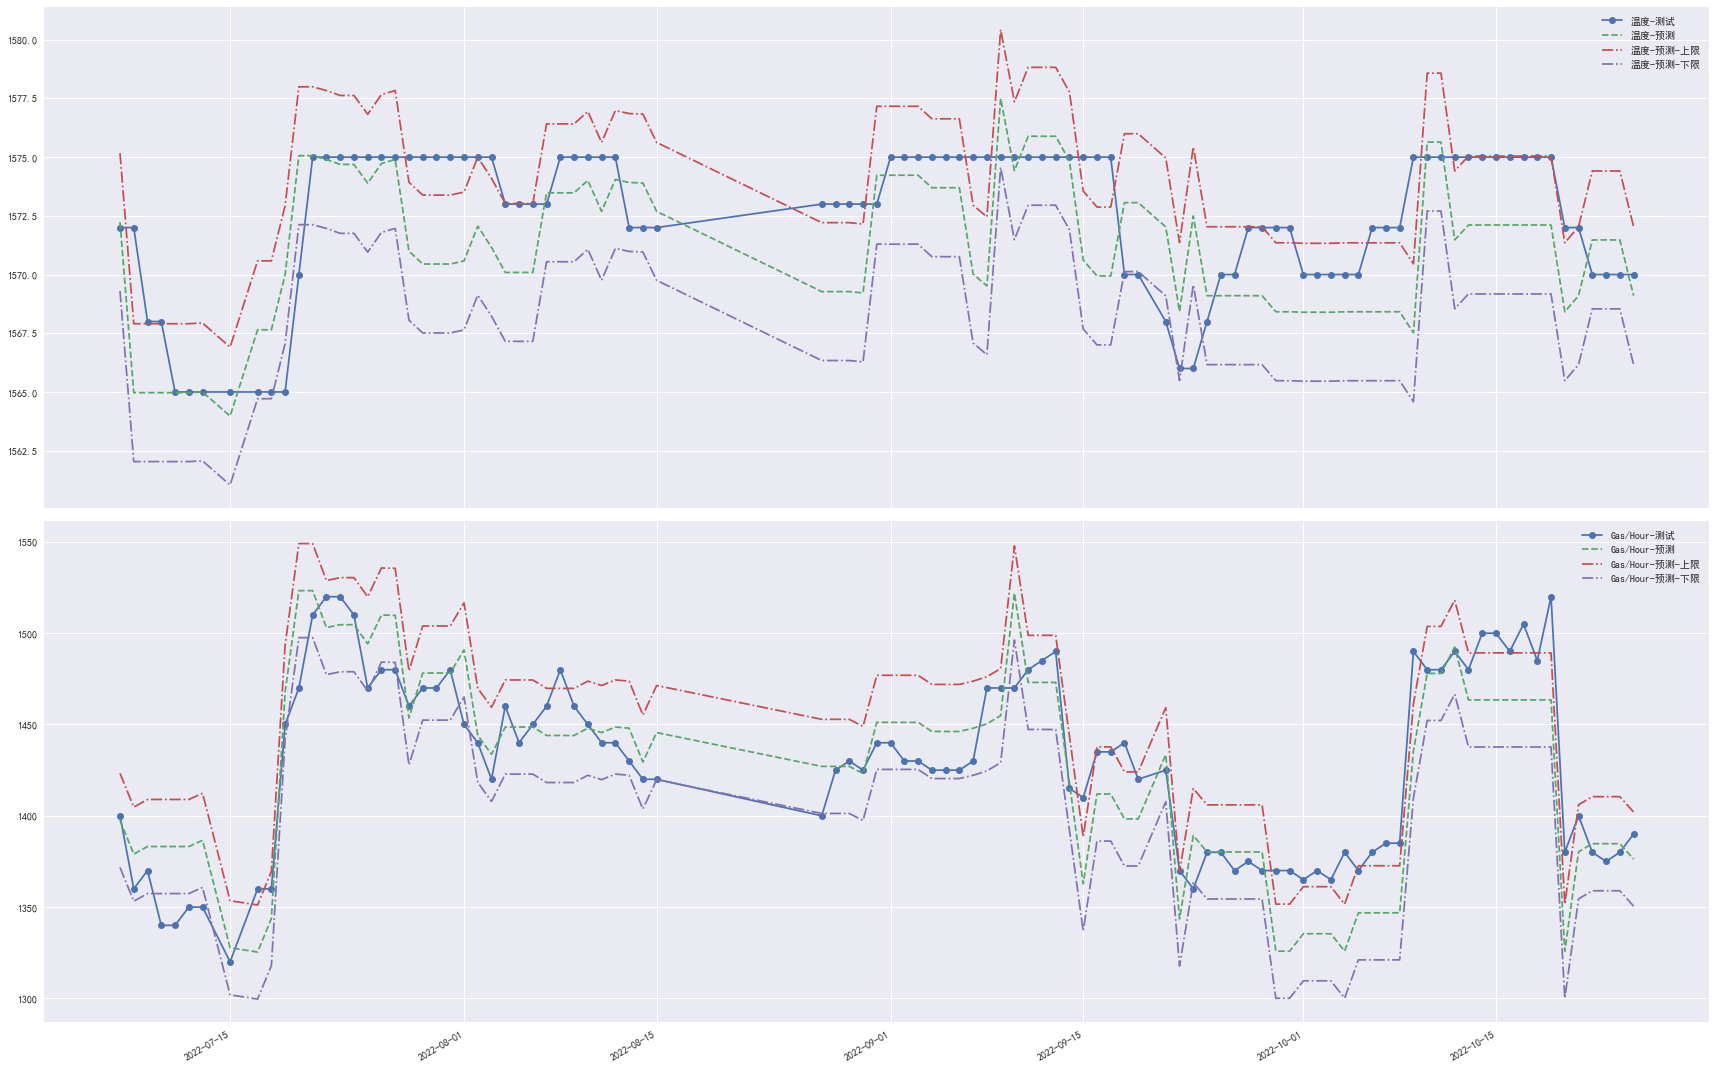

In [17]:
eva_model(grid,X_train,X_test,y_tem_train,y_tem_test,y_gas_train,y_gas_test)

AdaBoostRegressor模型

In [18]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
model = make_pipeline(AdaBoostRegressor(DecisionTreeRegressor(),n_estimators=300,random_state=0))
param_grid = {
        "adaboostregressor__n_estimators":[50,100,200,300,400],
        "adaboostregressor__learning_rate":[0.001,0.01,0.1,1],
        # "randomforestregressor__n_estimators":[100,500,1000,5000]
    }
grid = RandomizedSearchCV(model,param_grid,cv=5)
# grid = GridSearchCV(model,param_grid,cv=5)

温度误差(%): 0.1569476988411604 均方根误差RSME: 3.3114025181002154 R2分数: train: 0.8717856586501292 test: -0.12421080988524147
天然气误差(%): 1.2159426292086084 均方根误差RSME: 20.87977344242343 R2分数: train: 0.8948608858741752 test: 0.8244208550350147


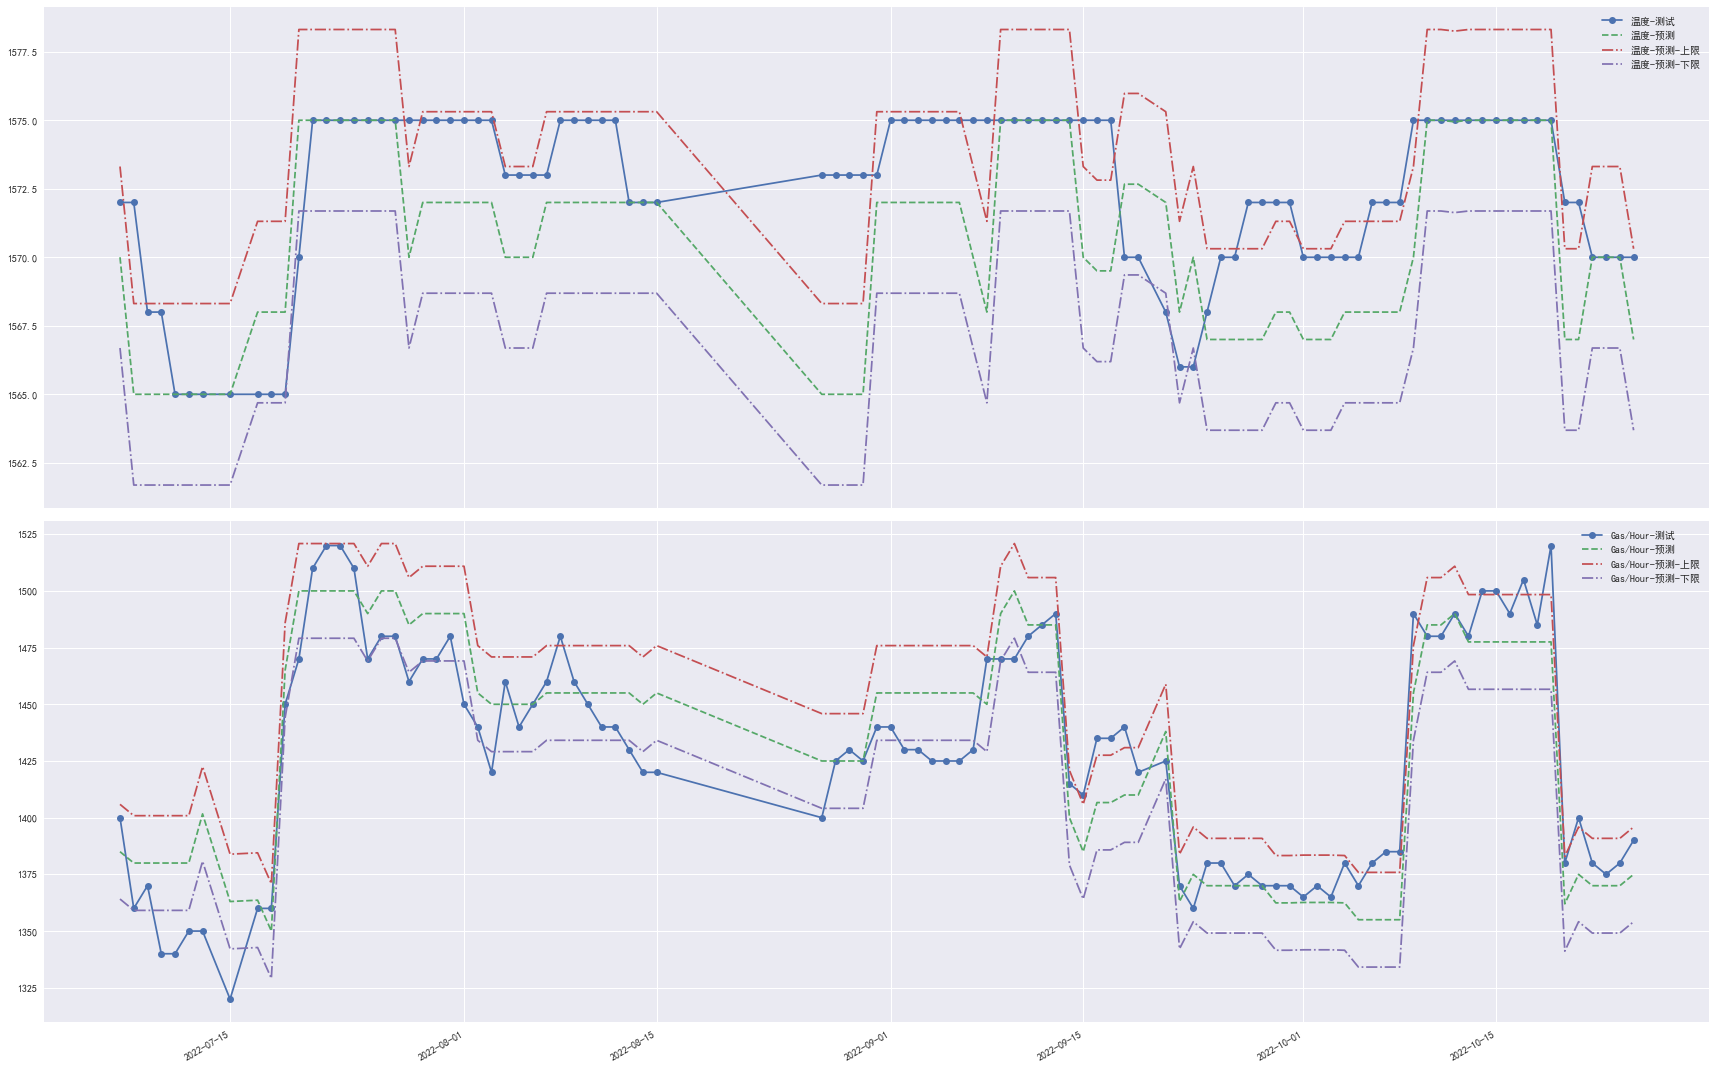

In [19]:
eva_model(grid,X_train,X_test,y_tem_train,y_tem_test,y_gas_train,y_gas_test)

XGBRegressor模型

In [20]:
from xgboost import XGBRegressor
model = make_pipeline(XGBRegressor(n_estimators=100,learning_rate=0.1,gamma=0))
param_grid = {
        "xgbregressor__n_estimators":[50,100,200,300],
        "xgbregressor__learning_rate":[0.0001,0.001,0.01,0.1,1],
        "xgbregressor__gamma":[0.0001,0.001,0.01,0.1,1],
        "xgbregressor__alpha":[0,0.0001,0.001,0.01,0.1,1],
        # "randomforestregressor__n_estimators":[100,500,1000,5000]
    }
grid = RandomizedSearchCV(model,param_grid,cv=5)
# grid = GridSearchCV(model,param_grid,cv=5)

温度误差(%): 0.1910267432349401 均方根误差RSME: 3.7233756241814633 R2分数: train: 0.9636475013487487 test: -0.42133846730649815
天然气误差(%): 1.5476563696107501 均方根误差RSME: 28.300713922140257 R2分数: train: 0.9822443310377472 test: 0.6774358125639401


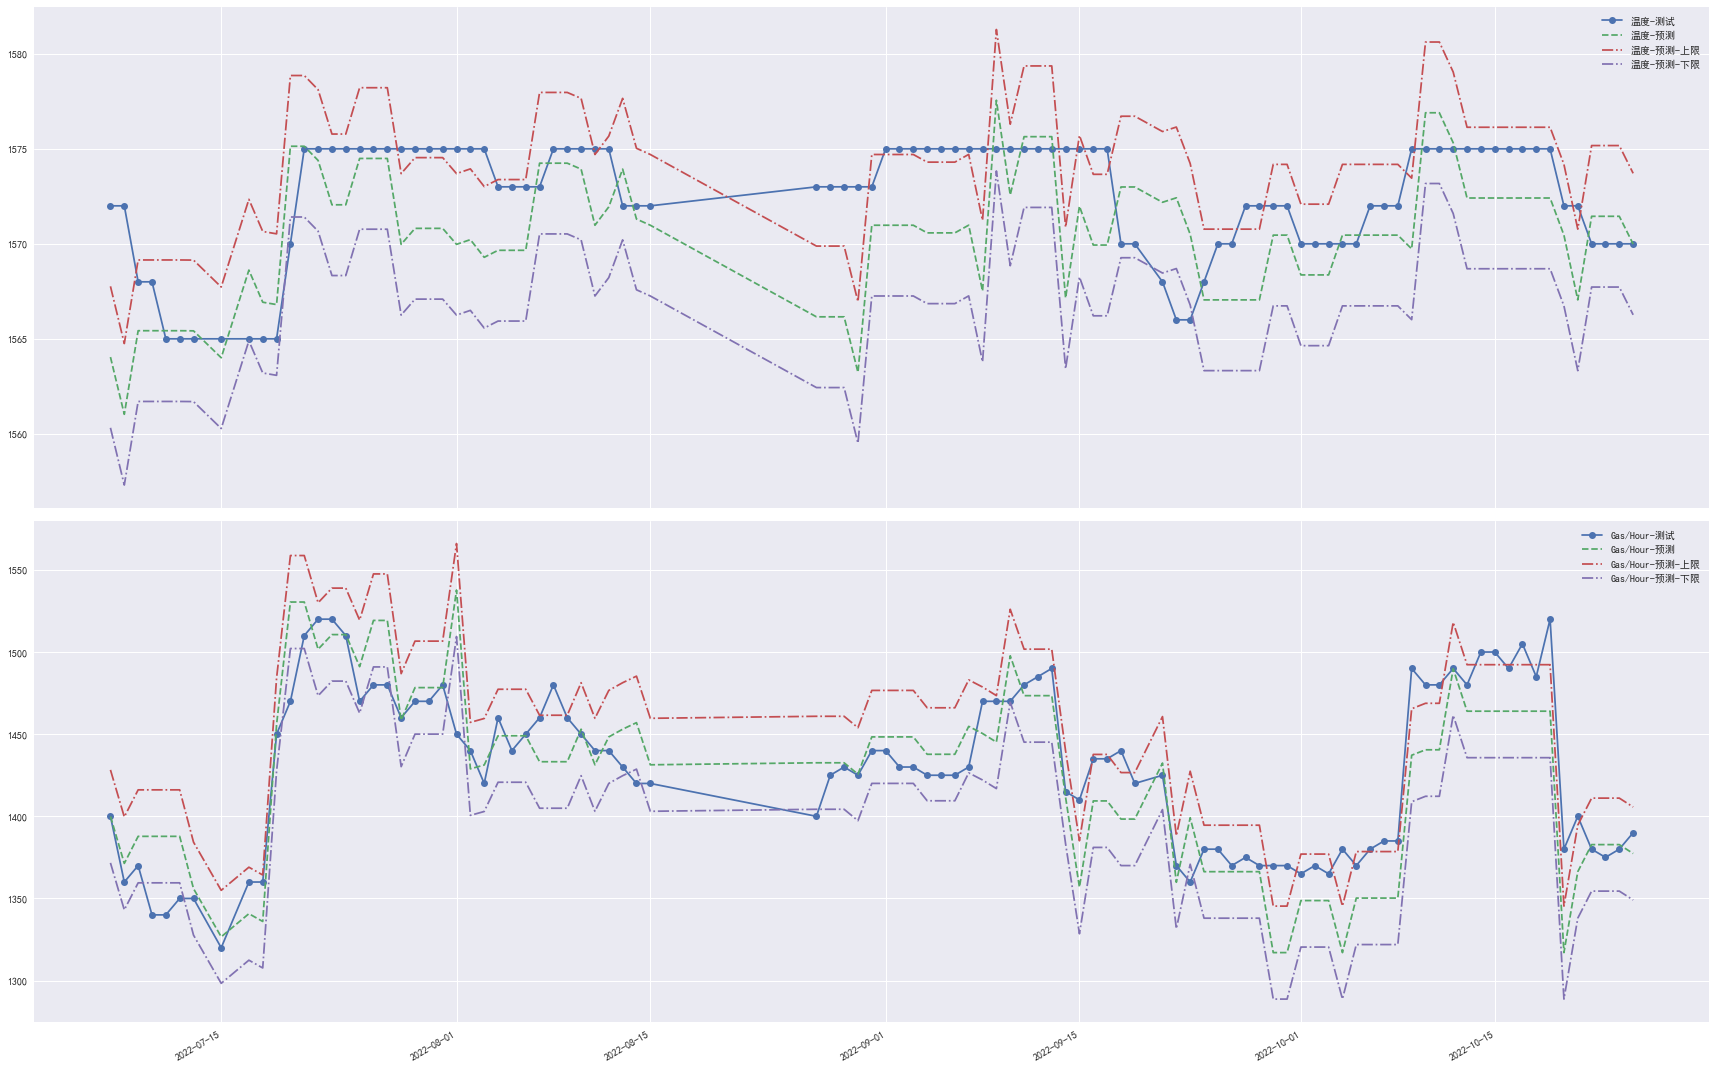

In [21]:
eva_model(grid,X_train,X_test,y_tem_train,y_tem_test,y_gas_train,y_gas_test)

3.4 LightGBM

In [22]:
import lightgbm as lgb

model = make_pipeline(lgb.LGBMRegressor())
param_grid = {
        "lgbmregressor__n_estimators":[100,200,300],
        "lgbmregressor__learning_rate":[0.00001,0.0001,0.001,0.01,0.1,1],
        "lgbmregressor__reg_alpha":[0,0.0001,0.001,0.01,0.1,1,10,100],
        # "randomforestregressor__n_estimators":[100,500,1000,5000]
    }
grid = RandomizedSearchCV(model,param_grid,cv=5)
# grid = GridSearchCV(model,param_grid,cv=5)
# grid.fit(X_train,y_tem_train)
# grid.best_params_

温度误差(%): 0.23882116869808398 均方根误差RSME: 4.181377061783237 R2分数: train: 0.04050503798919958 test: -0.7925136539279232
天然气误差(%): 1.3511200185228103 均方根误差RSME: 23.314878961953973 R2分数: train: 0.8241935273284968 test: 0.7810788624694375


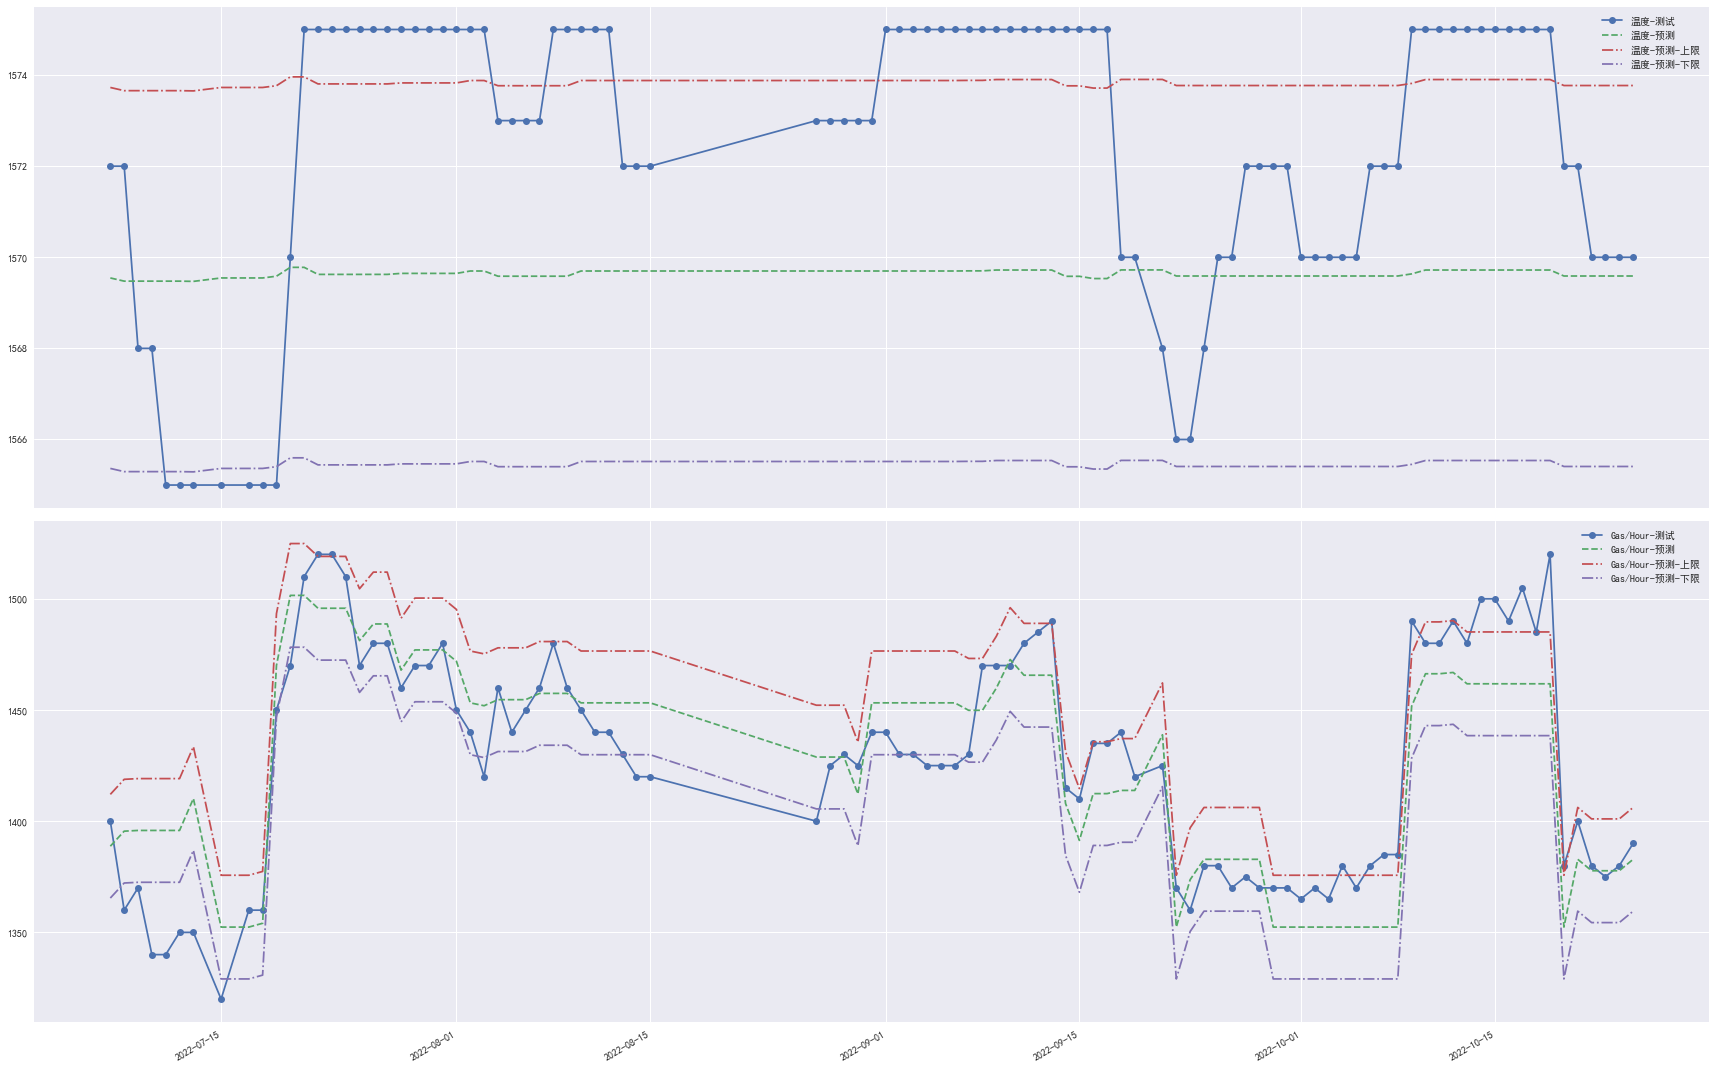

In [23]:
eva_model(grid,X_train,X_test,y_tem_train,y_tem_test,y_gas_train,y_gas_test)

3.5 GBR梯度提升机

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
model = make_pipeline(GradientBoostingRegressor())
param_grid = {
        "gradientboostingregressor__n_estimators":[5,10,50,100,200],
        # "gradientboostingregressor__n_estimators":[5,10,100,1000],
        "gradientboostingregressor__learning_rate":[0.0001,0.001,0.01,0.1,1],
        "gradientboostingregressor__alpha":[0,0.0001,0.001,0.01,0.1,1],
        # "gradientboostingregressor__max_depth":[1,2,3,4,5],
        # "randomforestregressor__n_estimators":[100,500,1000,5000]
    }
grid = RandomizedSearchCV(model,param_grid,cv=5)
# grid = GridSearchCV(model,param_grid,cv=5)

k:\python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "k:\python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "k:\python\Python310\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "k:\python\Python310\lib\site-packages\sklearn\ensemble\_gb.py", line 577, in fit
    self._check_params()
  File "k:\python\Python310\lib\site-packages\sklearn\ensembl

温度误差(%): 0.24044411945458602 均方根误差RSME: 4.206407211298685 R2分数: train: 0.0222047128818208 test: -0.8140382248887685


k:\python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "k:\python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "k:\python\Python310\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "k:\python\Python310\lib\site-packages\sklearn\ensemble\_gb.py", line 577, in fit
    self._check_params()
  File "k:\python\Python310\lib\site-packages\sklearn\ensembl

天然气误差(%): 1.267121063685718 均方根误差RSME: 22.21739680172317 R2分数: train: 0.7723229749618689 test: 0.8012039692179241


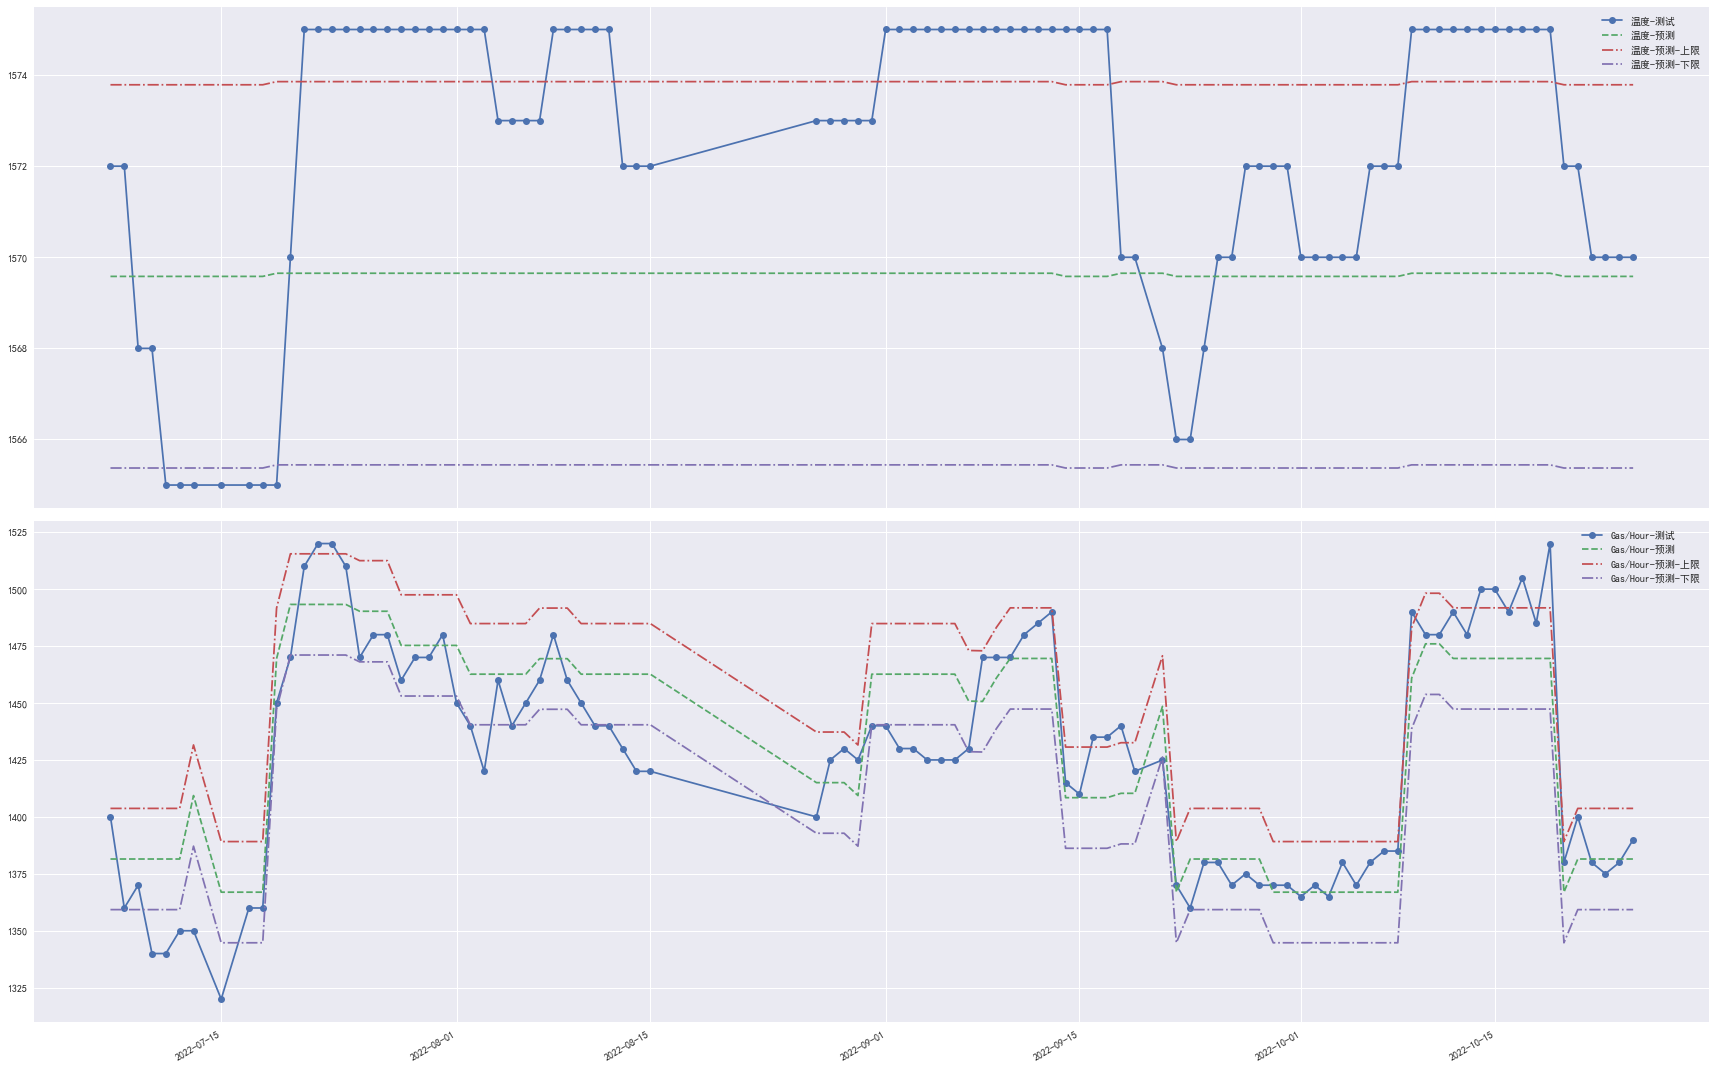

In [25]:
eva_model(grid,X_train,X_test,y_tem_train,y_tem_test,y_gas_train,y_gas_test)

MLP神经网络

In [26]:
from sklearn.neural_network import MLPRegressor
model = make_pipeline(MinMaxScaler(),MLPRegressor(solver="lbfgs"))
param_grid = {
        # "gradientboostingregressor__n_estimators":[1],
        "mlpregressor__solver":['lbfgs', 'sgd', 'adam'],
        "mlpregressor__hidden_layer_sizes":[(100,50,10)],
        # "mlpregressor__hidden_layer_sizes":[(10,),(50,),(100,),(100,30)],
        # "mlpregressor__learning_rate_init":[0.0001,0.001,0.01,0.1,1],
        "mlpregressor__alpha":[0,0.00001,0.0001,0.001,0.01,0.1,1,10,100],
        "mlpregressor__max_iter":[3000],
        # "gradientboostingregressor__learning_rate":[0.001,0.01,0.1,1,10,100],
        # "gradientboostingregressor__max_depth":[1,2,3,4,5],
        # "randomforestregressor__n_estimators":[100,500,1000,5000]
    }
grid = RandomizedSearchCV(model,param_grid,cv=5)
# grid = GridSearchCV(model,param_grid,cv=5)

k:\python\Python310\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
k:\python\Python310\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
k:\python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
k:\python\Python310\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
k:\python\Python310\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
k:\python\Python310\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
k:\python\Python310\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: 

温度误差(%): 0.21682144165772427 均方根误差RSME: 3.6972757158502167 R2分数: train: 0.0966634132472809 test: -0.4014818705539591


k:\python\Python310\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
k:\python\Python310\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
k:\python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
k:\python\Python310\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
k:\python\Python310\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
k:\python\Python310\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
k:\python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_percep

天然气误差(%): 1.24301372904288 均方根误差RSME: 22.914900709139292 R2分数: train: 0.6753763573556757 test: 0.7885258318528984


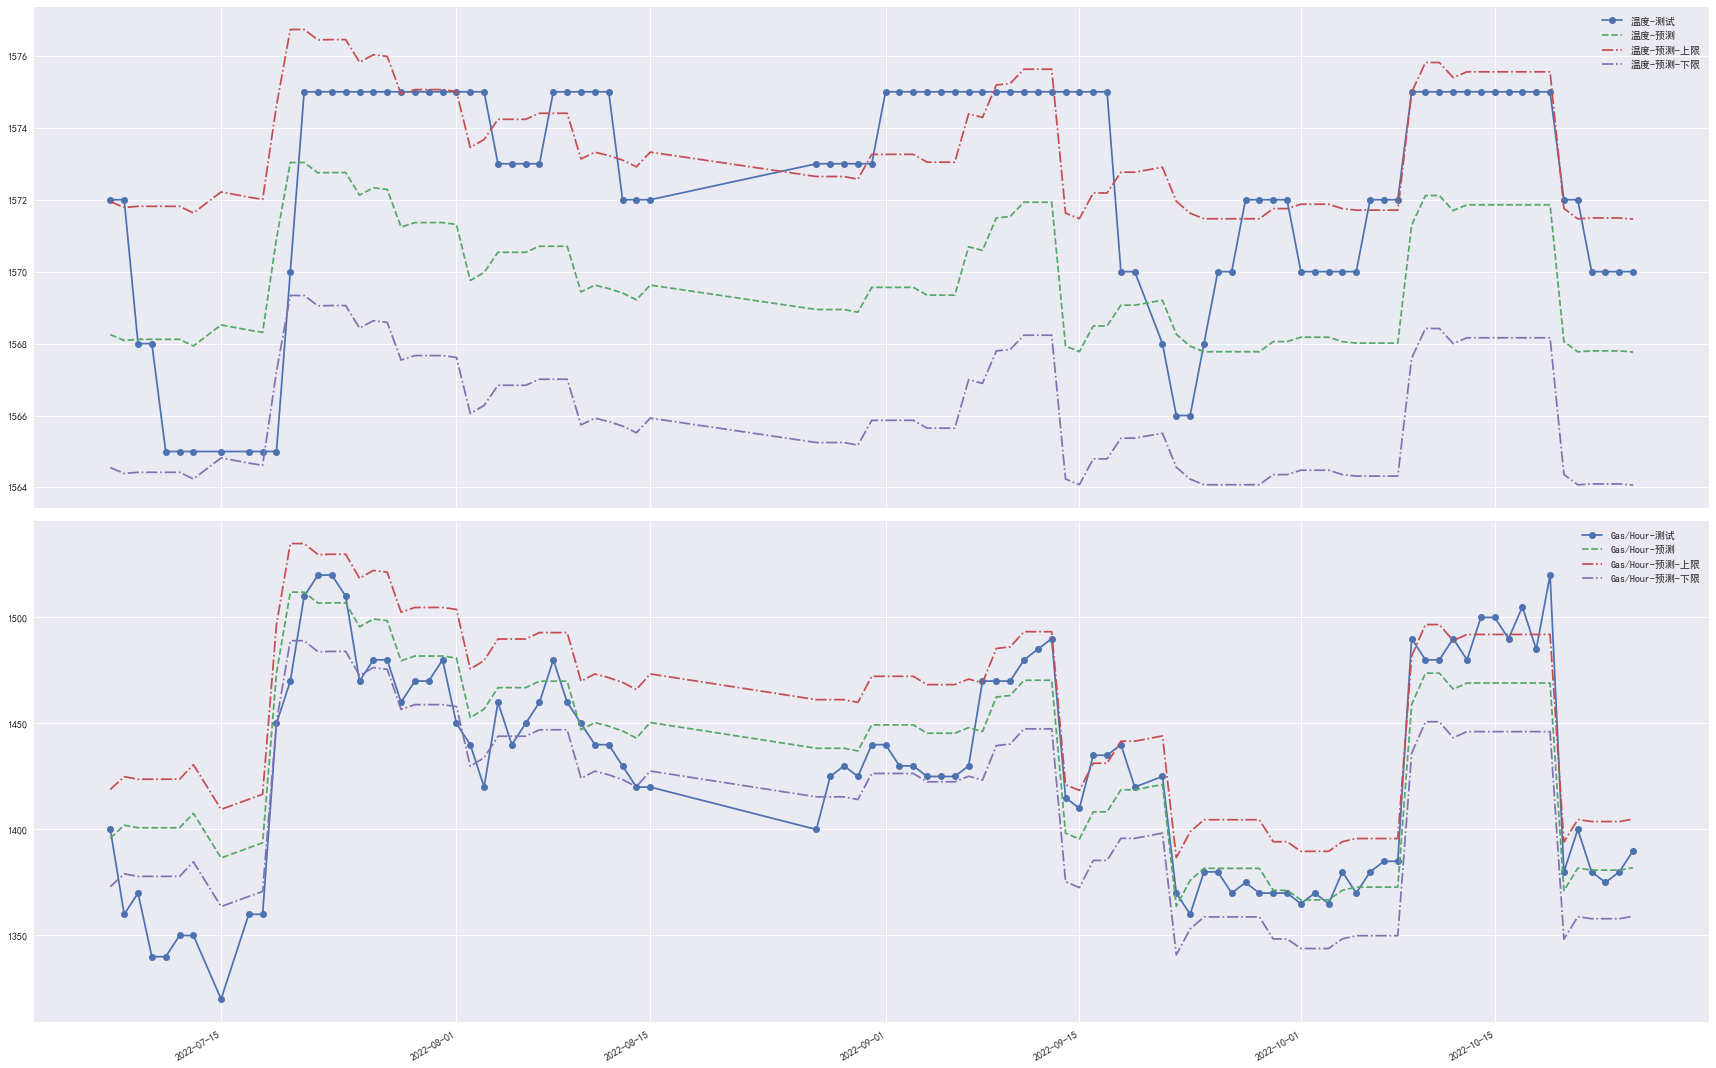

In [27]:
eva_model(grid,X_train,X_test,y_tem_train,y_tem_test,y_gas_train,y_gas_test)